In [1]:
x=1

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [20]:
# adata = sc.read('../../../../pipeline/data/multigrate_mil_reg/pbmc_mtg_final1/7a87db1eef_adata_both.h5ad') buggy
adata = sc.read('../../../../pipeline/data/multigrate_mil/pbmc_mtg_final1/c1d69bdf7d_adata_both.h5ad')
# adata = sc.read('../../../../pipeline/data/multigrate_mil_reg/pbmc_mtg_final1/d31255f30e_adata_both.h5ad')
adata

AnnData object with n_obs × n_vars = 256051 × 20
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn'
    obsm: 'X_umap', 'latent_0', 'latent_1', 'latent_2', 'latent_3', 'latent_4'

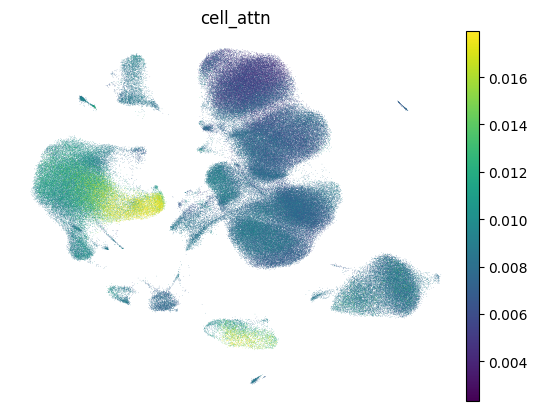

In [21]:
sc.pl.umap(adata, color='cell_attn', ncols=1, frameon=False, vmax='p99')

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' w

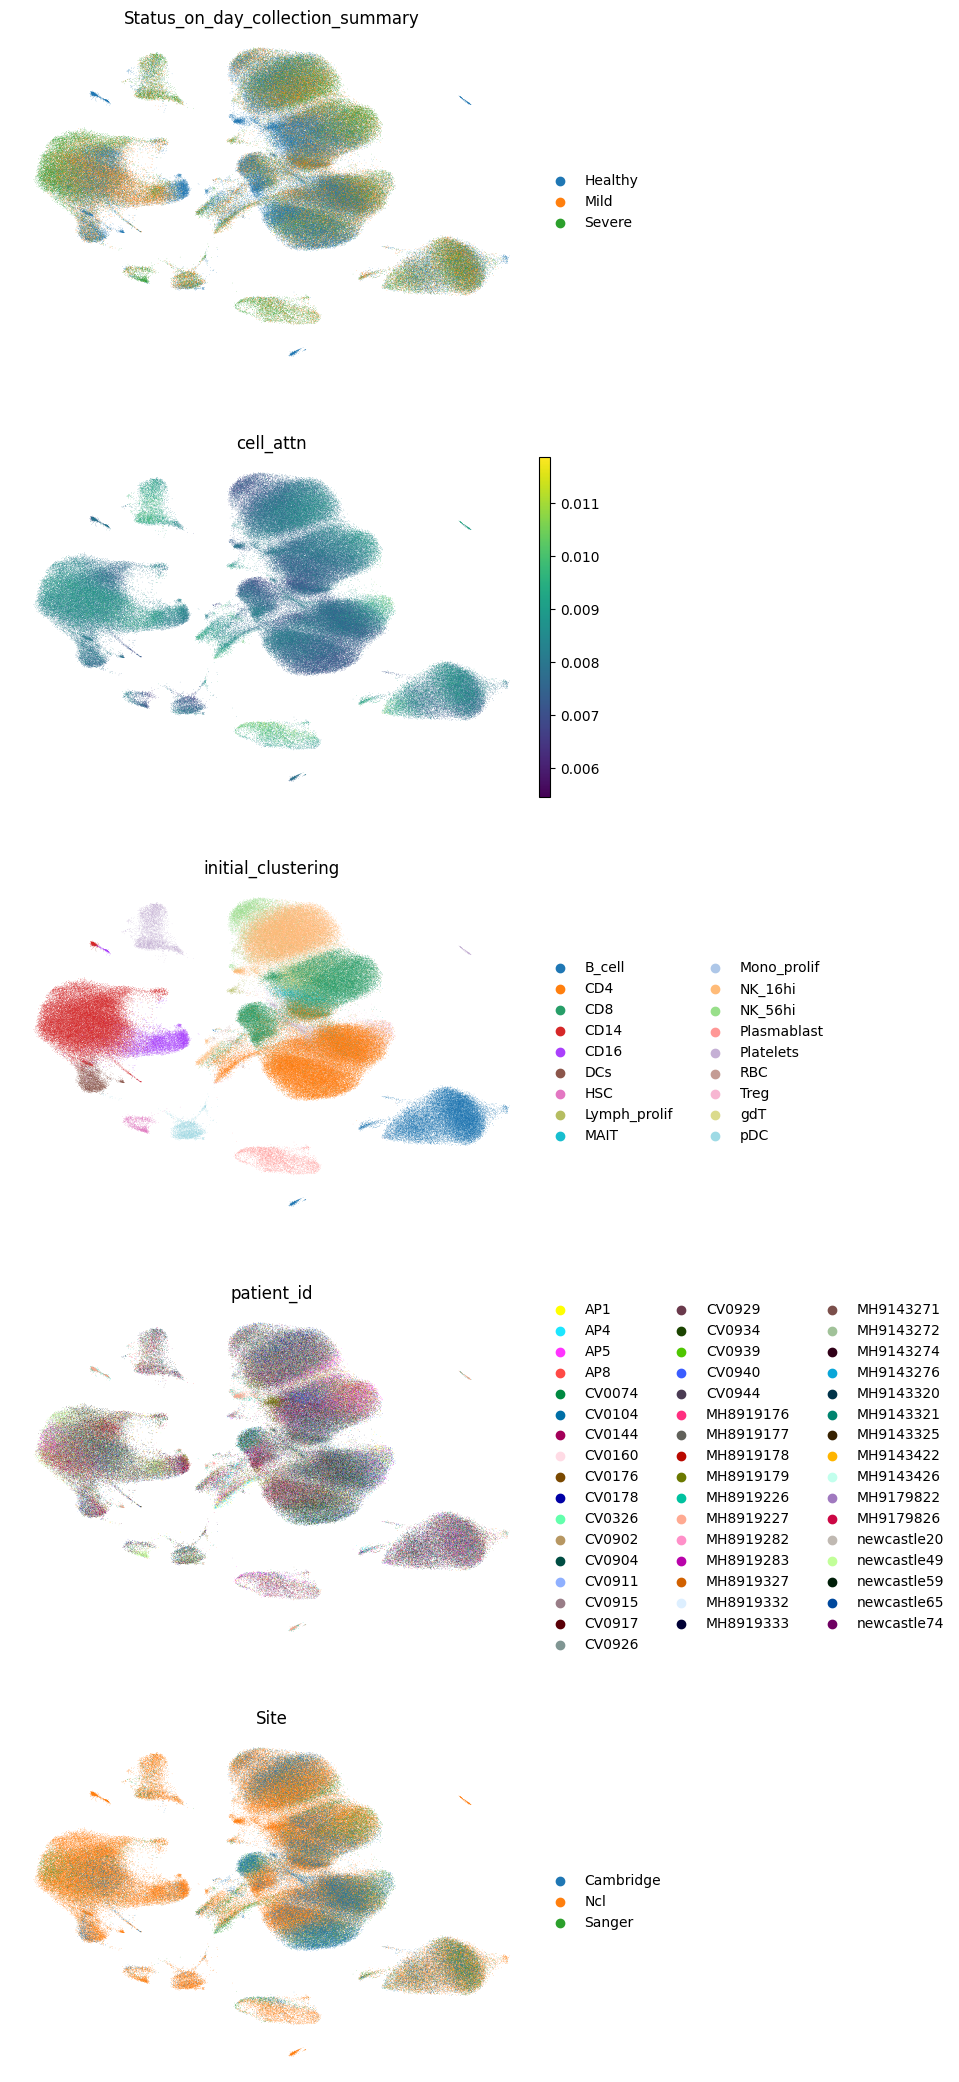

In [17]:
sc.pl.umap(adata, color=['Status_on_day_collection_summary', 'cell_attn', 'initial_clustering', 'patient_id', 'Site'], ncols=1, frameon=False,)

## which ct changed most percentage-wise between conditions

In [6]:
ct_df = adata.obs[['Status_on_day_collection_summary', 'initial_clustering']]
ct_df

Status_on_day_collection_summary  \
covid_index                                                     
AAACCTGAGACCACGA-newcastle65                          Healthy   
AAACCTGAGATGTCGG-newcastle65                          Healthy   
AAACCTGAGGCGATAC-newcastle65                          Healthy   
AAACCTGAGTACACCT-newcastle65                          Healthy   
AAACCTGAGTGAATTG-newcastle65                          Healthy   
...                                                       ...   
BGCV15_TTTGGTTGTTGGGACA-1                              Severe   
BGCV15_TTTGGTTTCAAGATCC-1                             Healthy   
BGCV15_TTTGTCAAGGCGATAC-1                              Severe   
BGCV15_TTTGTCACAAGCCATT-1                             Healthy   
BGCV15_TTTGTCATCGAATGGG-1                              Severe   

                             initial_clustering  
covid_index                                      
AAACCTGAGACCACGA-newcastle65                CD4  
AAACCTGAGATGTCGG-newcastle65            NK_16hi  
AAACCTGAGGCGATAC-newcastle65               Treg  
AAACCTGAGTACACCT-newcastle65            NK_16hi  
AAACCTGAGTGAATTG-newcastle65                CD4  
...                                         ...  
BGCV15_TTTGGTTGTTGGGACA-1                   CD4  
BGCV15_TTTGGTTTCAAGATCC-1               NK_16hi  
BGCV15_TTTGTCAAGGCGATAC-1                   CD4  
BGCV15_TTTGTCACAAGCCATT-1               NK_16hi  
BGCV15_TTTGTCATCGAATGGG-1               NK_16hi  

[256051 rows x 2 columns]

In [7]:
ct_df_group = ct_df.groupby('Status_on_day_collection_summary').value_counts(normalize=True).mul(100)

In [8]:
ct_df_group = ct_df_group.unstack().reindex(['Healthy', 'Mild', 'Severe']).T
ct_df_group

Status_on_day_collection_summary    Healthy       Mild     Severe
initial_clustering                                               
B_cell                             7.798926  10.613397  11.691050
CD4                               29.130556  24.407099  20.337316
CD8                               19.369532  14.057488  14.178752
CD14                              10.626655  18.917111  17.498243
CD16                               3.571760   4.007579   1.963841
DCs                                2.179536   1.390764   0.727017
HSC                                0.148394   0.242733   1.020891
Lymph_prolif                       0.290605   1.330080   1.308375
MAIT                               2.075454   1.202521   0.512362
Mono_prolif                        0.004122   0.021053   0.196767
NK_16hi                           13.025691  12.726169  17.185204
NK_56hi                            2.289801   2.184601   1.673801
Plasmablast                        0.118509   1.239675   3.569923
Platelets                          2.210451   1.815547   3.819076
RBC                                0.336978   0.375246   0.208267
Treg                               2.411402   2.128872   1.810516
gdT                                3.701605   2.147448   1.010669
pDC                                0.710024   1.192614   1.287932

In [9]:
ct_df_group['Mild - Healthy'] = (ct_df_group['Mild'] - ct_df_group['Healthy']) / ct_df_group['Healthy']
ct_df_group['Severe - Healthy'] = (ct_df_group['Severe'] - ct_df_group['Healthy']) / ct_df_group['Healthy']
ct_df_group['Severe - Mild'] = (ct_df_group['Severe'] - ct_df_group['Mild']) / ct_df_group['Healthy']

In [10]:
adata.obs['initial_clustering'].value_counts()

CD4             63893
CD8             41244
CD14            39282
NK_16hi         36366
B_cell          25288
CD16             8239
Platelets        6600
gdT              6117
Treg             5476
NK_56hi          5296
Plasmablast      3910
DCs              3807
MAIT             3386
pDC              2660
Lymph_prolif     2380
HSC              1139
RBC               793
Mono_prolif       175
Name: initial_clustering, dtype: int64

In [11]:
ct_df_group[['Healthy', 'Mild', 'Severe', 'Mild - Healthy', 'Severe - Healthy']]

Status_on_day_collection_summary    Healthy       Mild     Severe  \
initial_clustering                                                  
B_cell                             7.798926  10.613397  11.691050   
CD4                               29.130556  24.407099  20.337316   
CD8                               19.369532  14.057488  14.178752   
CD14                              10.626655  18.917111  17.498243   
CD16                               3.571760   4.007579   1.963841   
DCs                                2.179536   1.390764   0.727017   
HSC                                0.148394   0.242733   1.020891   
Lymph_prolif                       0.290605   1.330080   1.308375   
MAIT                               2.075454   1.202521   0.512362   
Mono_prolif                        0.004122   0.021053   0.196767   
NK_16hi                           13.025691  12.726169  17.185204   
NK_56hi                            2.289801   2.184601   1.673801   
Plasmablast                        0.118509   1.239675   3.569923   
Platelets                          2.210451   1.815547   3.819076   
RBC                                0.336978   0.375246   0.208267   
Treg                               2.411402   2.128872   1.810516   
gdT                                3.701605   2.147448   1.010669   
pDC                                0.710024   1.192614   1.287932   

Status_on_day_collection_summary  Mild - Healthy  Severe - Healthy  
initial_clustering                                                  
B_cell                                  0.360879          0.499059  
CD4                                    -0.162148         -0.301856  
CD8                                    -0.274247         -0.267987  
CD14                                    0.780157          0.646637  
CD16                                    0.122018         -0.450176  
DCs                                    -0.361899         -0.666435  
HSC                                     0.635737          5.879597  
Lymph_prolif                            3.576939          3.502250  
MAIT                                   -0.420598         -0.753133  
Mono_prolif                             4.107506         46.735278  
NK_16hi                                -0.022995          0.319332  
NK_56hi                                -0.045943         -0.269019  
Plasmablast                             9.460589         29.123629  
Platelets                              -0.178653          0.727736  
RBC                                     0.113563         -0.381957  
Treg                                   -0.117164         -0.249185  
gdT                                    -0.419860         -0.726965  
pDC                                     0.679682          0.813928

## top 10% cells per condition

In [18]:
dfs = []
for cond in np.unique(adata.obs['Status_on_day_collection_summary']):
    adata_tmp = adata[adata.obs['Status_on_day_collection_summary'] == cond].copy()
    threshold_idx = int(len(adata_tmp) * 0.9)
    threshold_value = sorted(adata_tmp.obs['cell_attn'])[threshold_idx]
    adata_tmp.obs['group'] = 'all cells'
    adata_tmp.obs.loc[adata_tmp.obs['cell_attn'] >= threshold_value, 'group'] = 'top 10% cells'
    adata.obs[f'top_cells_{cond}'] = False
    adata.obs.loc[adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs_names, f'top_cells_{cond}'] = True
    adata.obs[f'top_cells_{cond}'] = adata.obs[f'top_cells_{cond}'].astype('category')
    dfs.append(adata_tmp[adata_tmp.obs['group'] == 'top 10% cells'].obs[['initial_clustering', 'Status_on_day_collection_summary']])

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


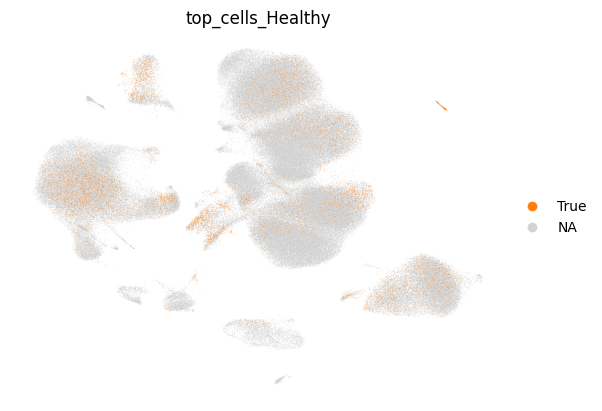

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


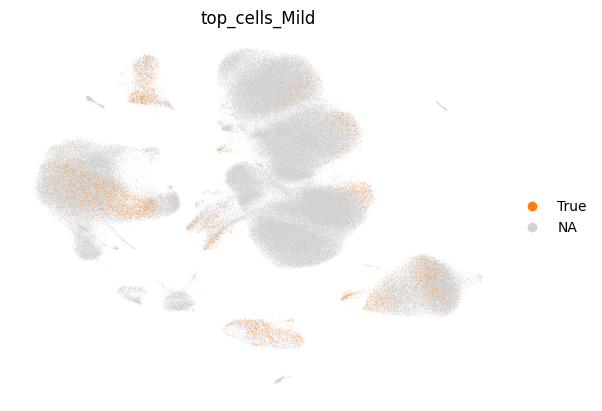

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


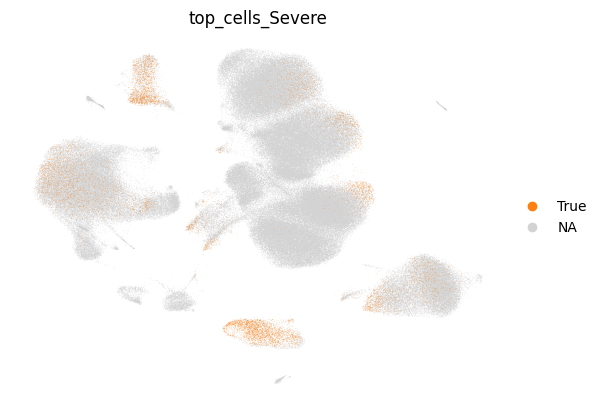

In [19]:
for cond in np.unique(adata.obs['Status_on_day_collection_summary']):
    sc.pl.umap(adata, color=[f'top_cells_{cond}'], groups=[True], frameon=False)

B_cell


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


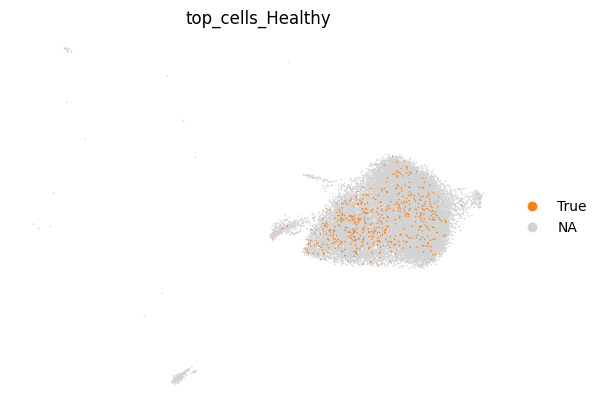

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


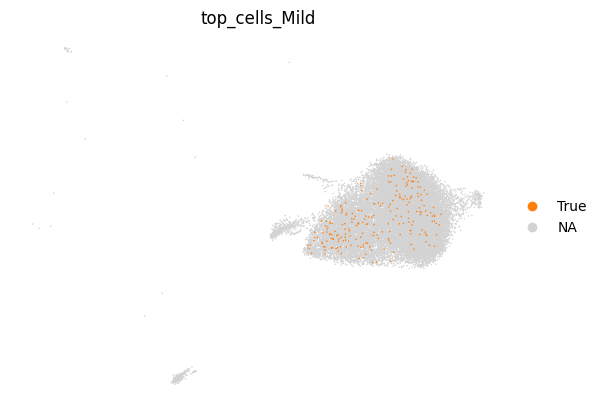

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


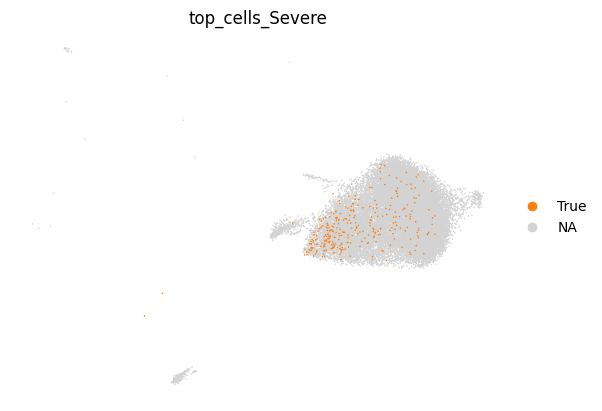

CD4


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


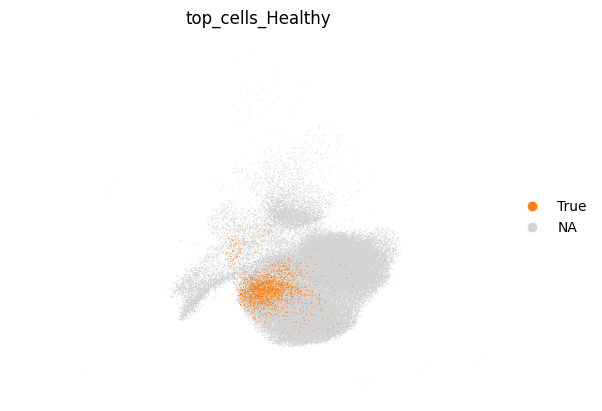

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


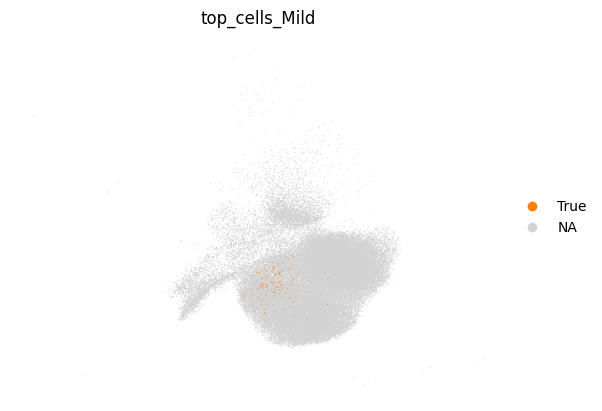

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


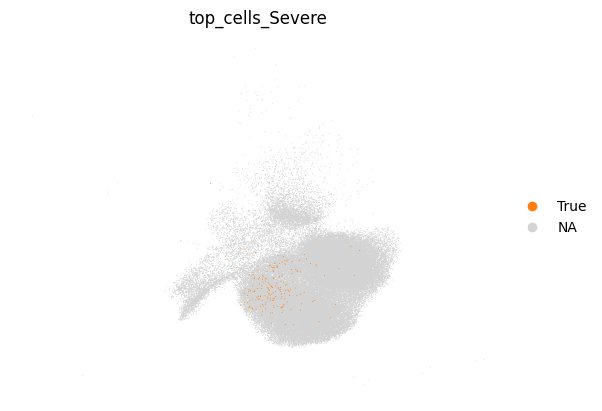

CD8


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


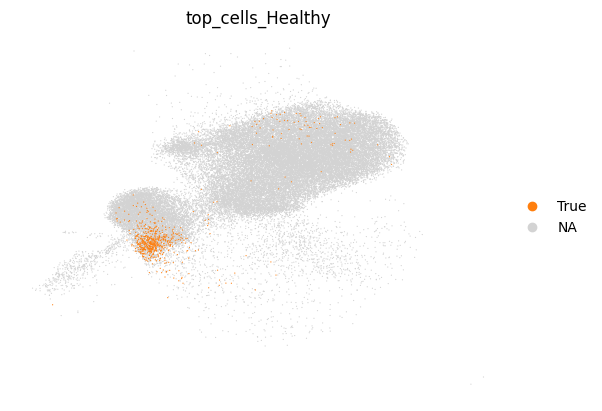

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


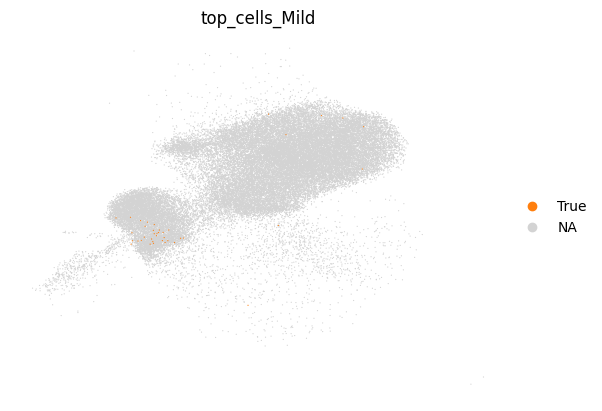

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


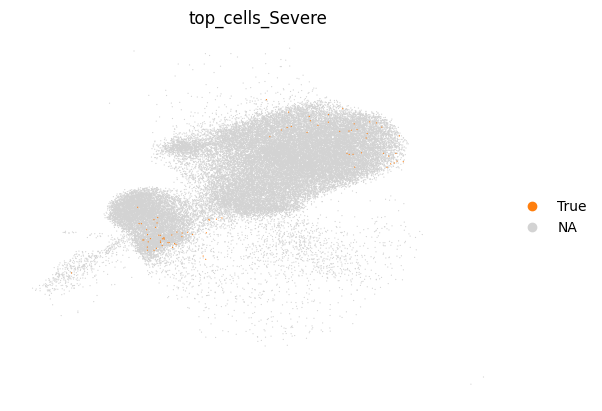

CD14


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


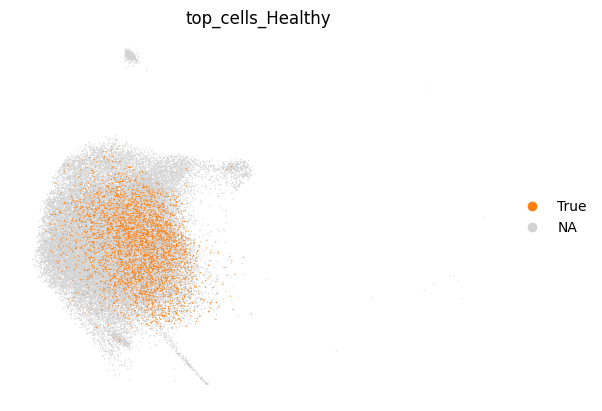

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


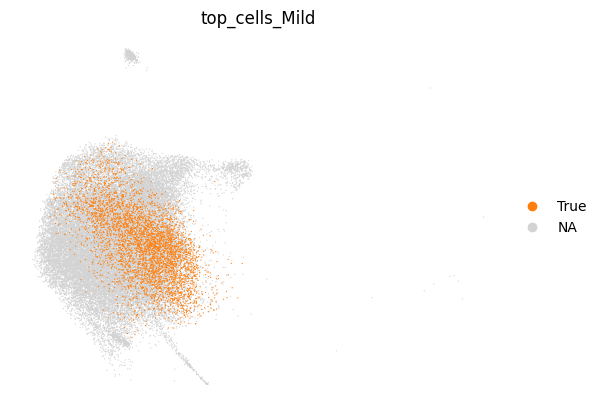

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


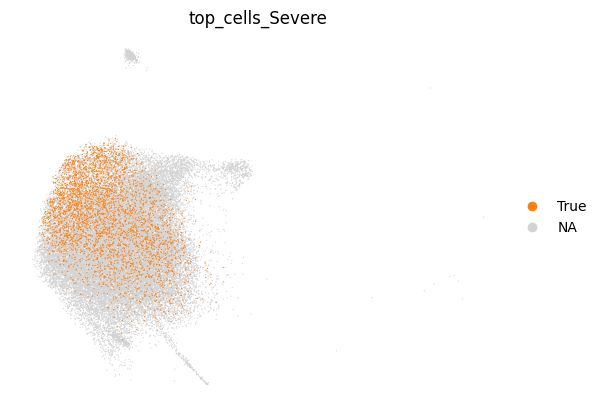

CD16


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


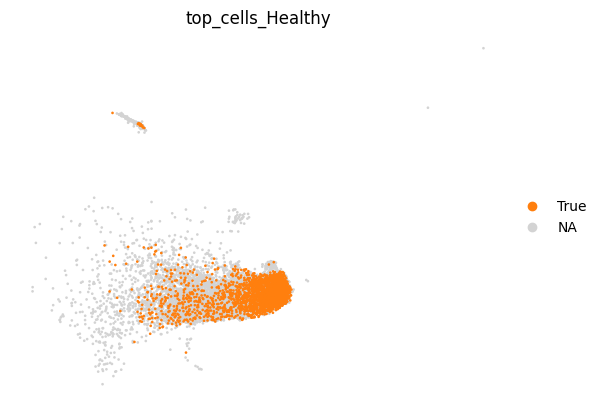

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


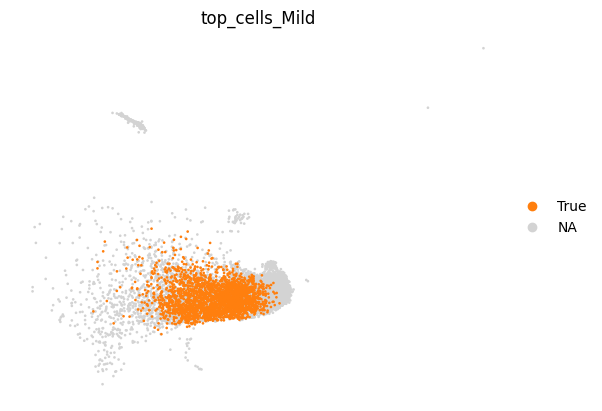

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


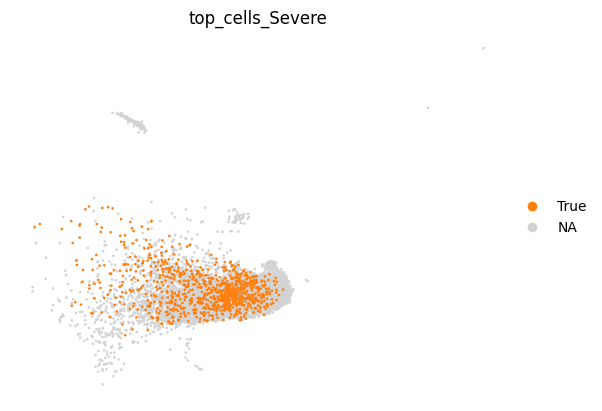

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


DCs


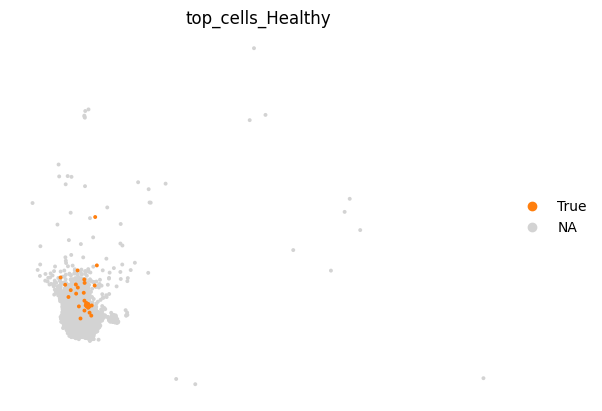

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


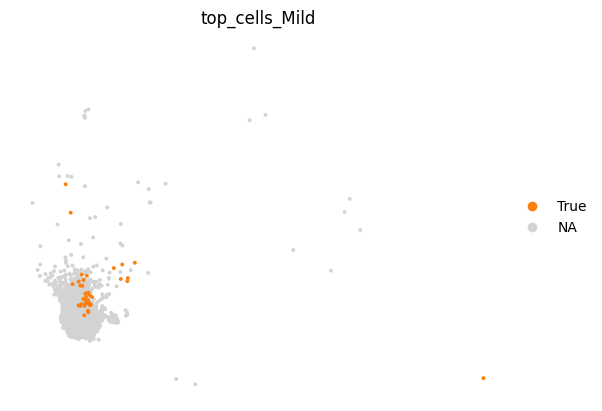

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


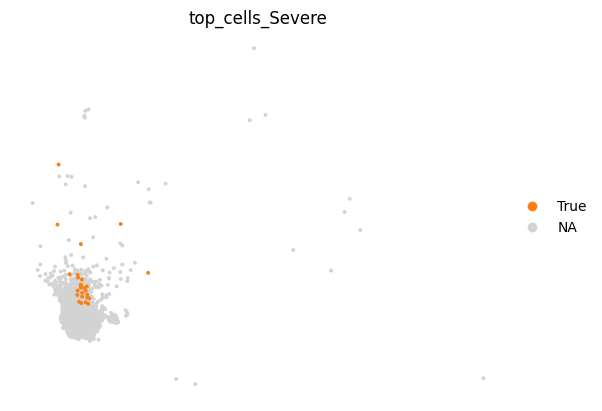

HSC


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


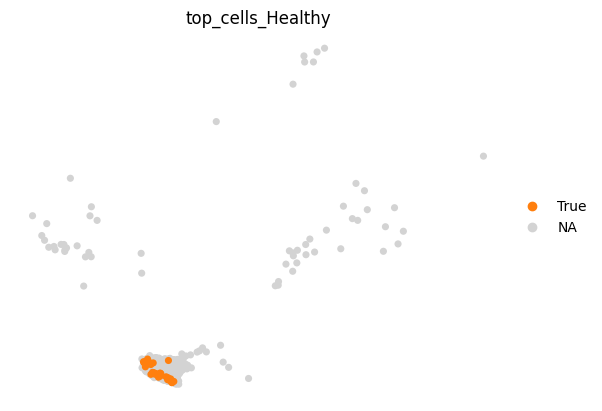

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


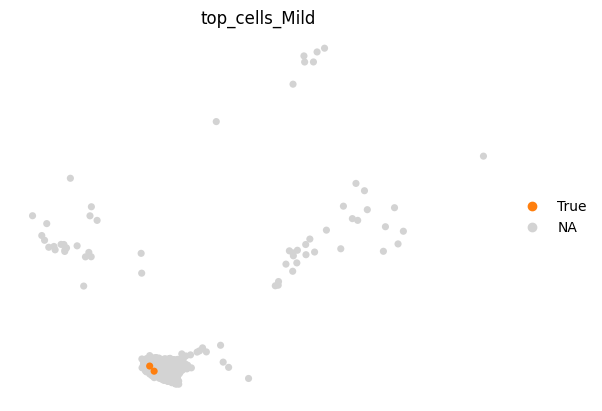

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


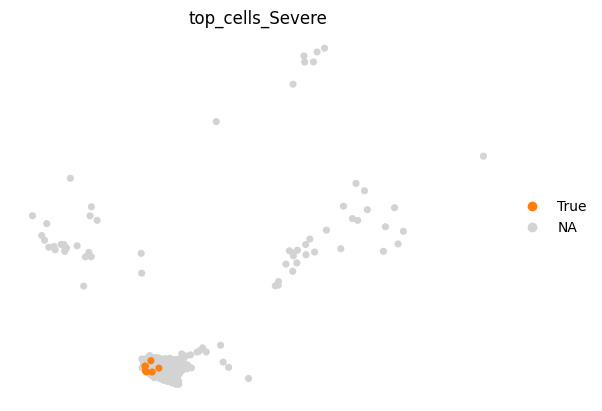

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Lymph_prolif


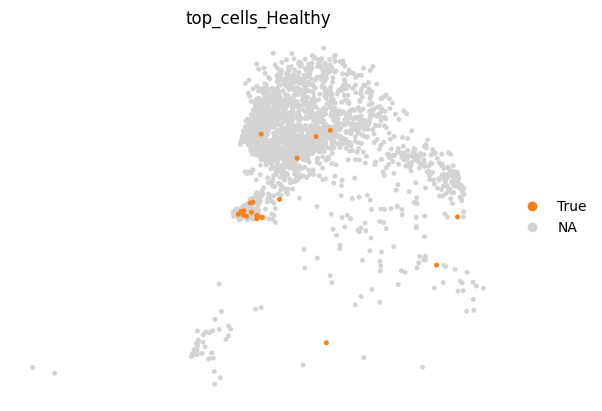

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


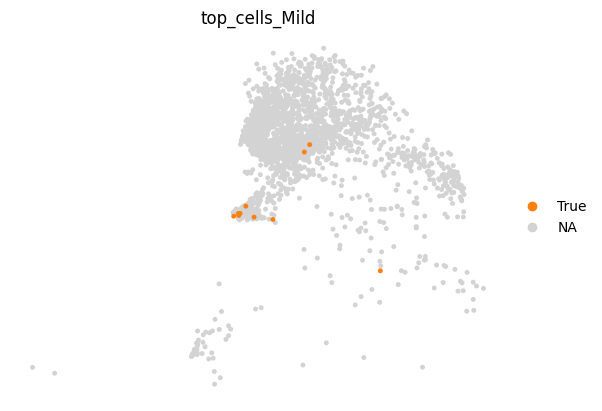

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


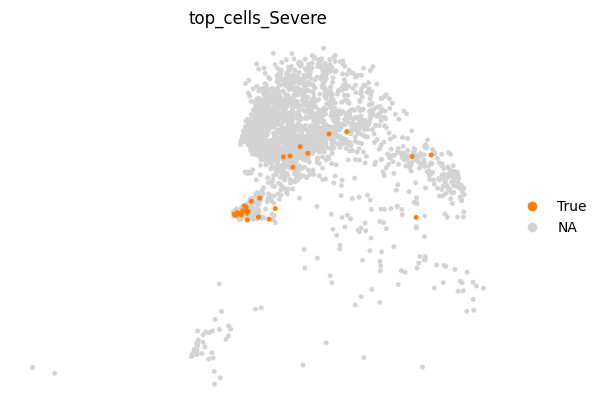

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


MAIT


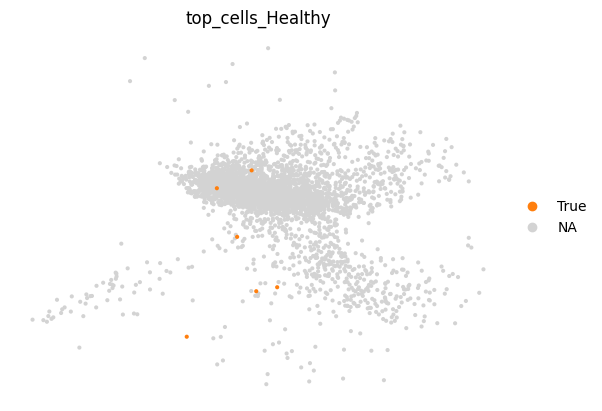

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


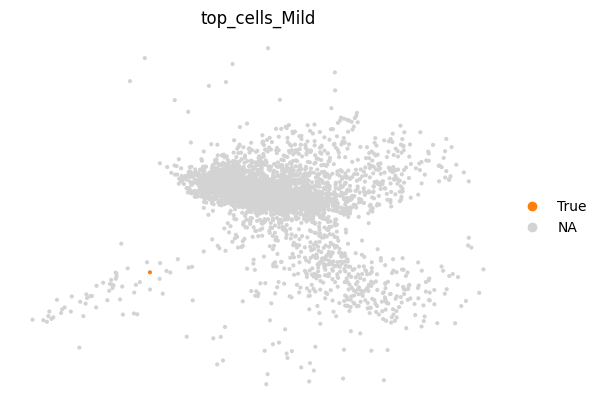

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


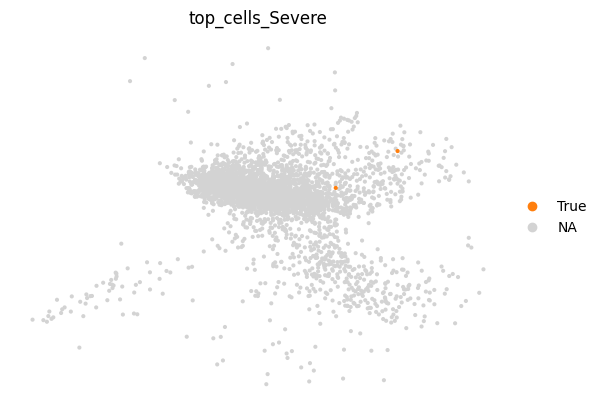

Mono_prolif


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


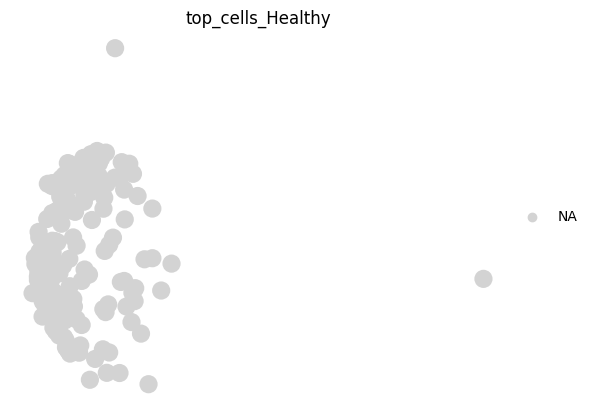

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


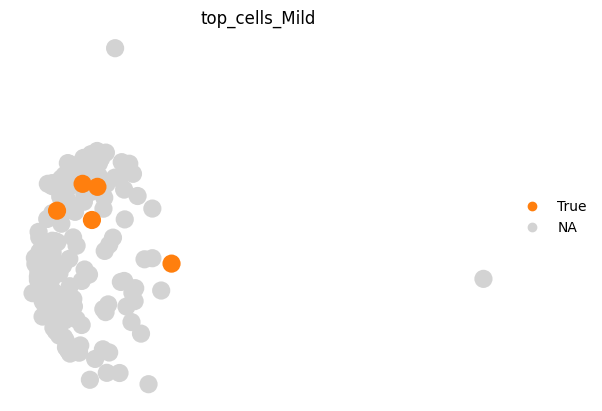

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


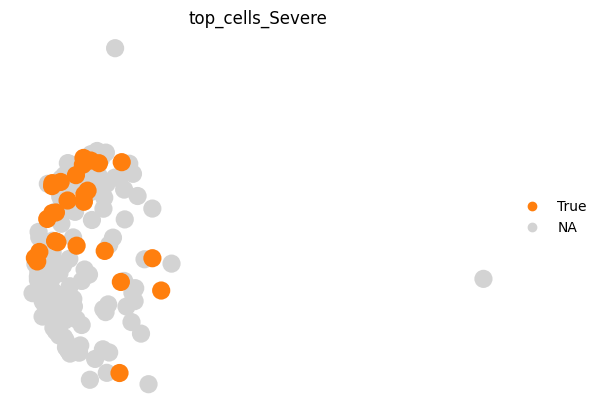

NK_16hi


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


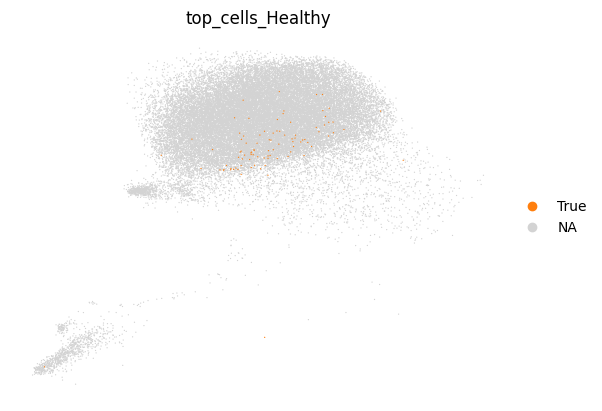

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


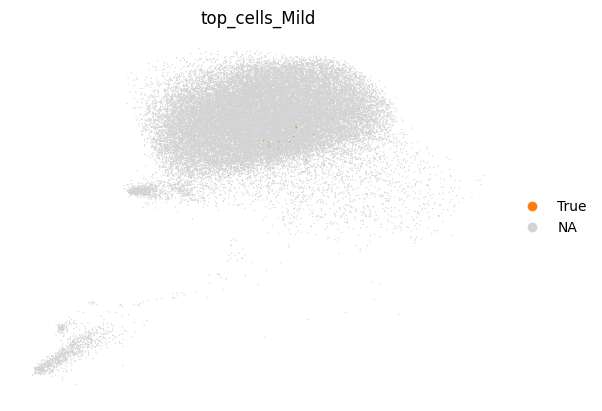

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


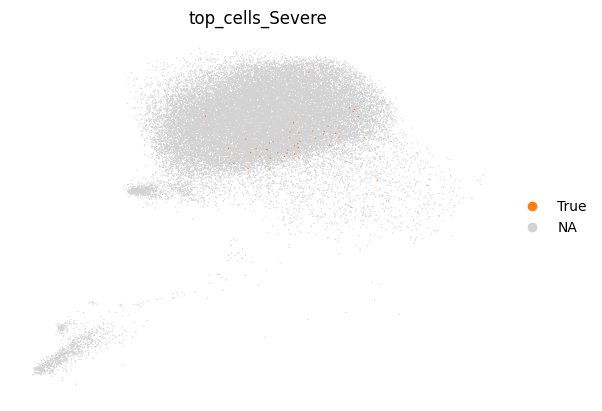

NK_56hi


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


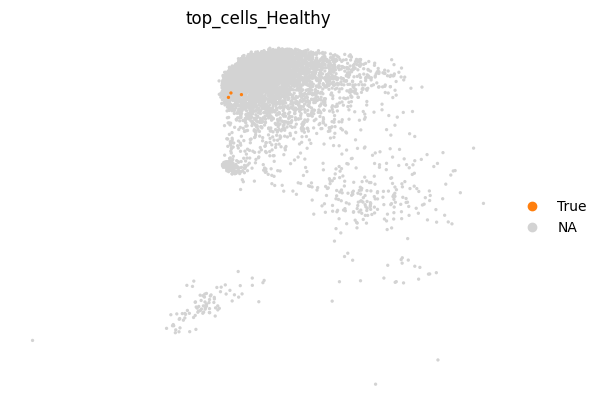

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


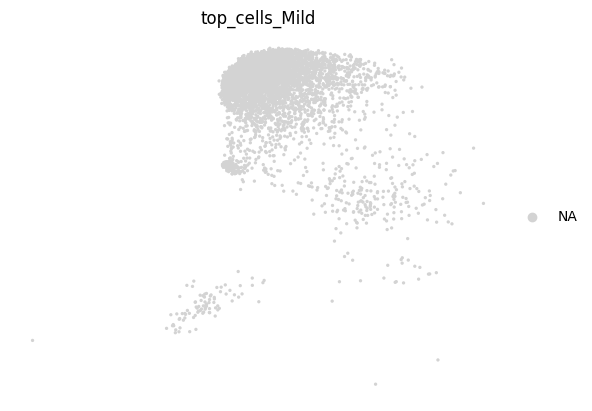

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


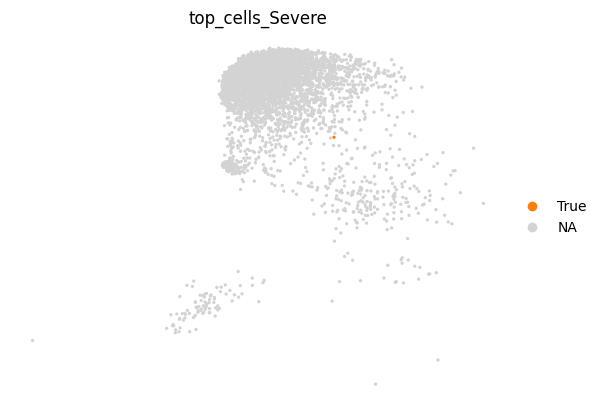

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Plasmablast


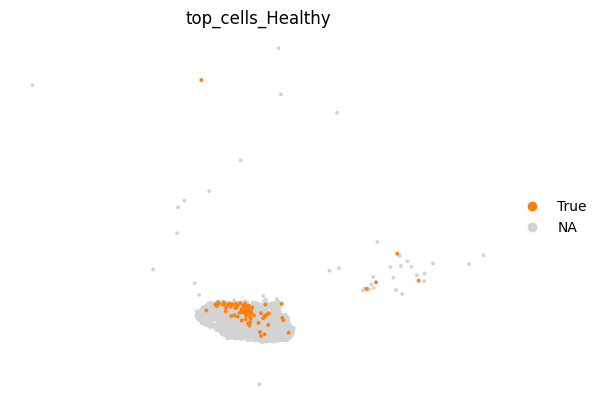

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


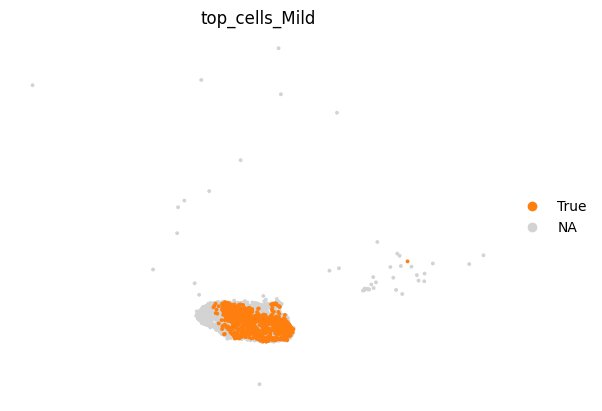

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


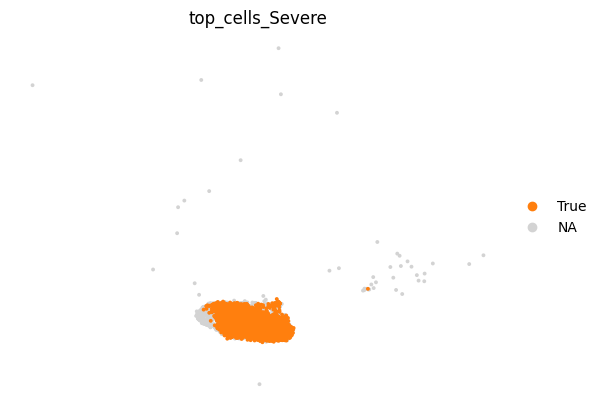

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Platelets


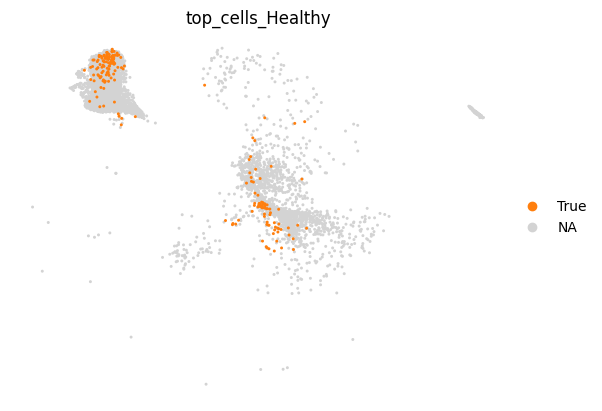

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


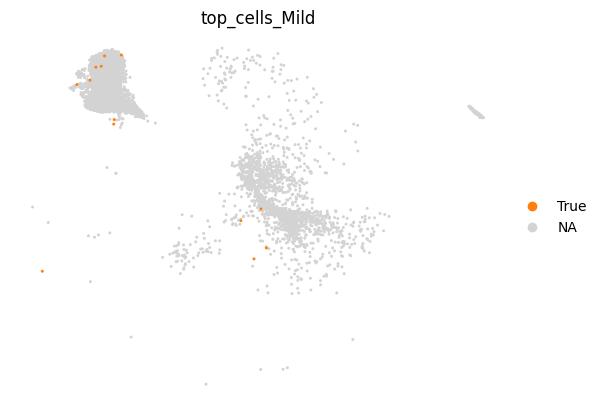

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


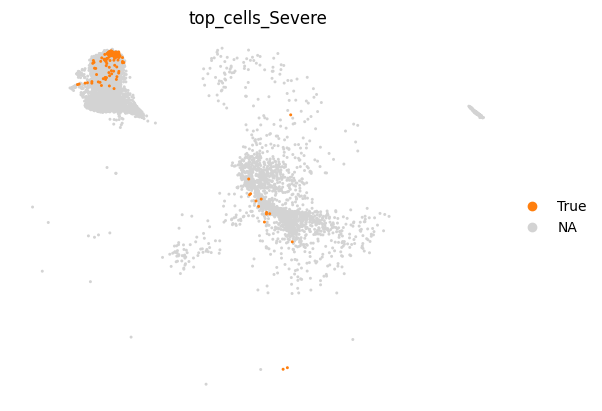

RBC


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


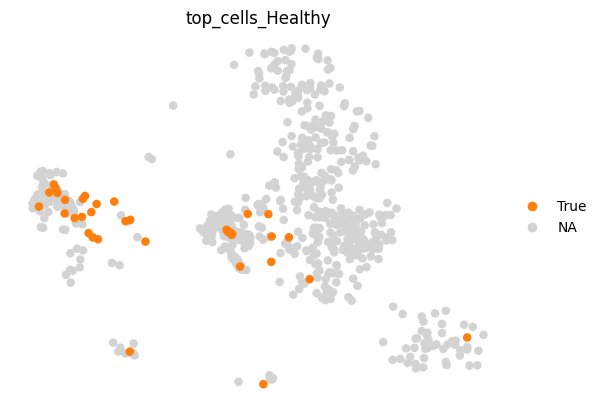

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


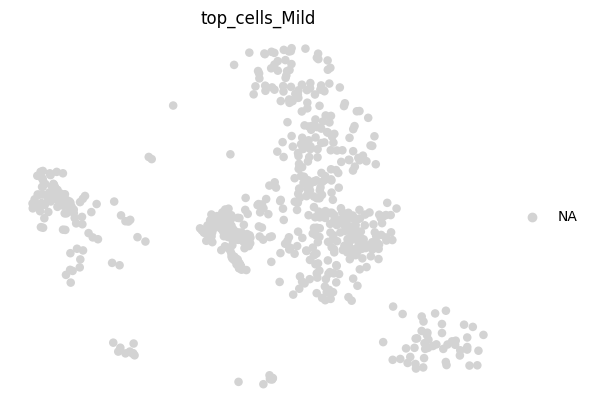

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


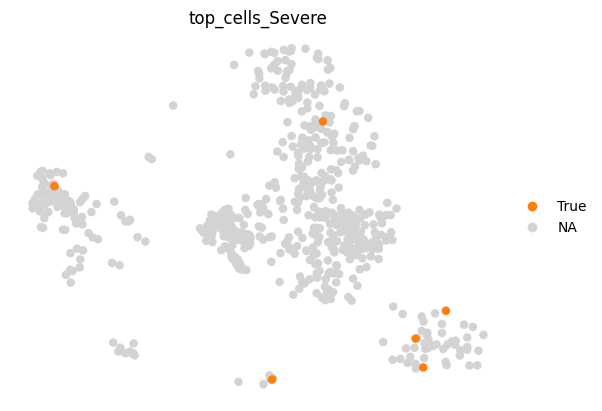

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


Treg


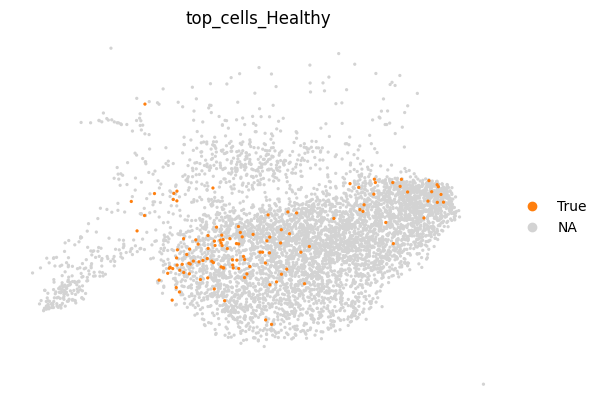

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


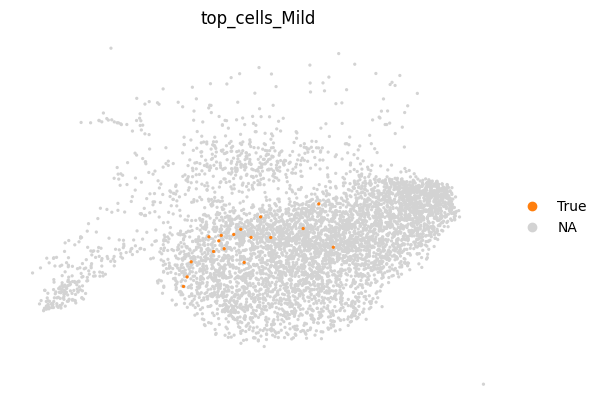

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


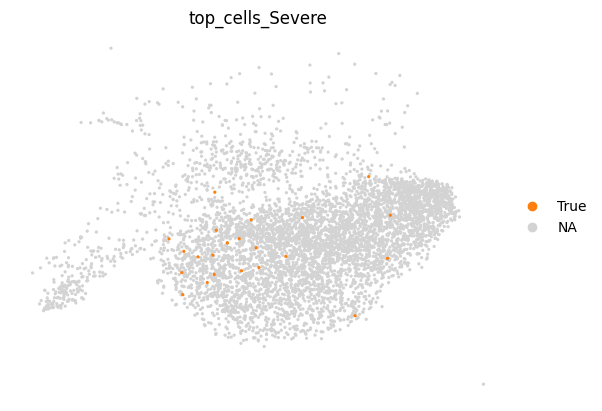

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


gdT


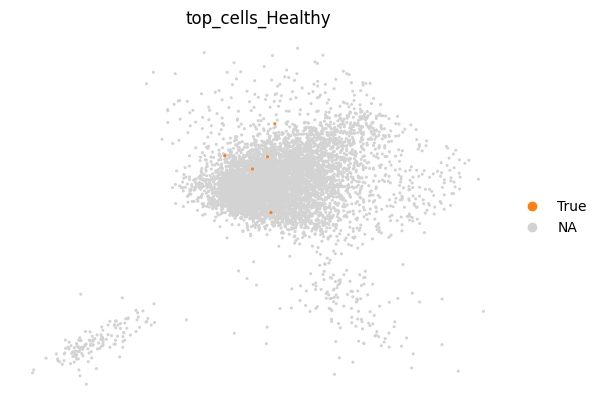

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


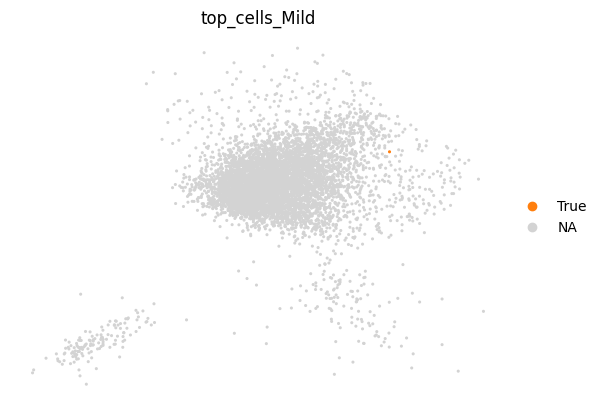

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


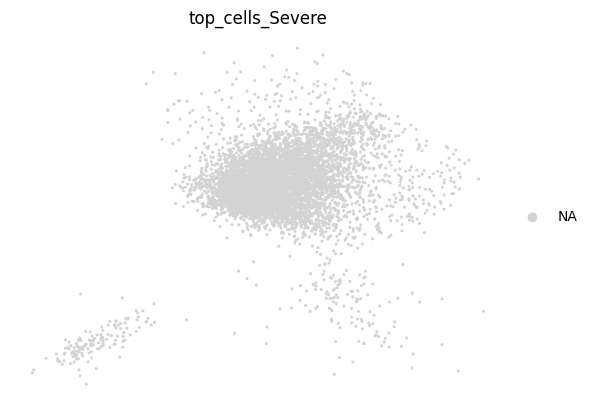

pDC


/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


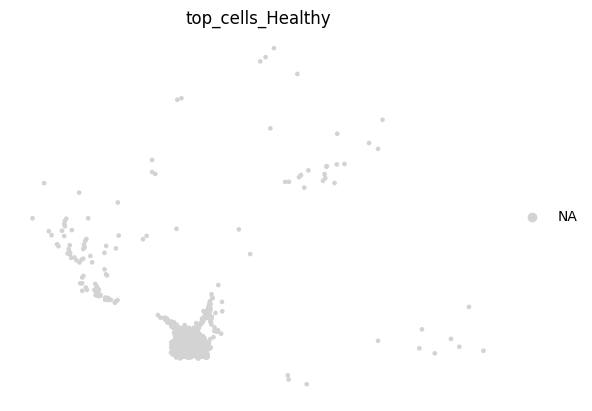

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


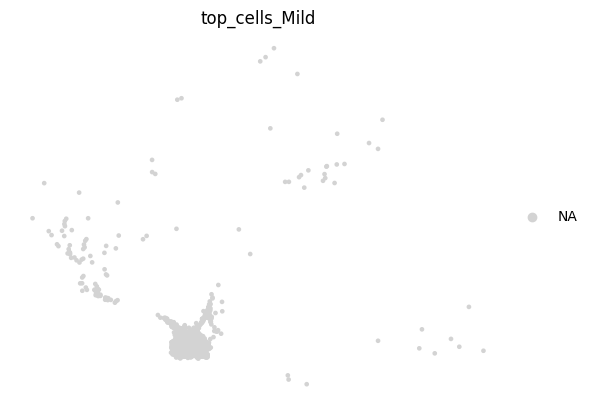

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


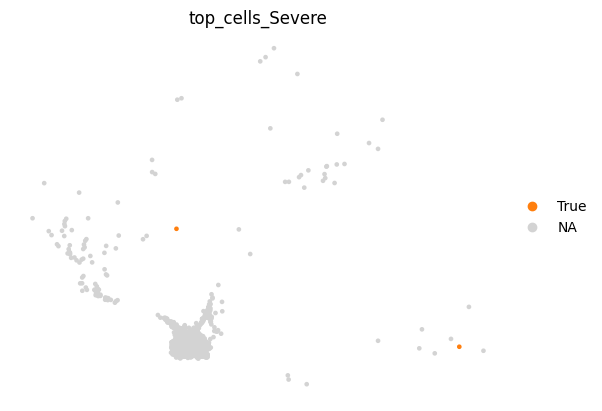

In [13]:
for ct in adata.obs['initial_clustering'].cat.categories:
    print('========')
    print(ct)
    adata_ct = adata[adata.obs['initial_clustering'] == ct].copy()
    for cond in np.unique(adata_ct.obs['Status_on_day_collection_summary']):
        sc.pl.umap(adata_ct, color=[f'top_cells_{cond}'], groups=[True], frameon=False)

In [15]:
df = pd.concat(dfs)
df

initial_clustering  \
covid_index                                       
AAACGGGAGATAGCAT-newcastle65               CD14   
AAACGGGAGCACAGGT-newcastle65               CD14   
AAAGATGCACGCCAGT-newcastle65               CD14   
AAAGCAAAGGGTCTCC-newcastle65                DCs   
AAAGCAACAAGGTTTC-newcastle65             B_cell   
...                                         ...   
BGCV15_GTTCTCGGTACCCAAT-1           Plasmablast   
BGCV15_TGGTTCCTCTGCTGCT-1                  CD14   
BGCV15_TGTATTCAGTTAGCGG-1               NK_16hi   
BGCV15_TTAGGCACAAGAAGAG-1               NK_16hi   
BGCV15_TTAGTTCCAATCCAAC-1                   CD8   

                             Status_on_day_collection_summary  
covid_index                                                    
AAACGGGAGATAGCAT-newcastle65                          Healthy  
AAACGGGAGCACAGGT-newcastle65                          Healthy  
AAAGATGCACGCCAGT-newcastle65                          Healthy  
AAAGCAAAGGGTCTCC-newcastle65                          Healthy  
AAAGCAACAAGGTTTC-newcastle65                          Healthy  
...                                                       ...  
BGCV15_GTTCTCGGTACCCAAT-1                              Severe  
BGCV15_TGGTTCCTCTGCTGCT-1                              Severe  
BGCV15_TGTATTCAGTTAGCGG-1                              Severe  
BGCV15_TTAGGCACAAGAAGAG-1                              Severe  
BGCV15_TTAGTTCCAATCCAAC-1                              Severe  

[25606 rows x 2 columns]

In [16]:
df_group = df.groupby('Status_on_day_collection_summary').value_counts(normalize=True).mul(100)
df_group

Status_on_day_collection_summary  initial_clustering
Healthy                           CD14                  37.561830
                                  CD16                  16.333471
                                  B_cell                13.685078
                                  DCs                    8.779885
                                  NK_16hi                7.666941
                                  Platelets              5.111294
                                  RBC                    2.998763
                                  CD8                    2.689613
                                  CD4                    1.896125
                                  Plasmablast            1.051113
                                  Treg                   0.762572
                                  gdT                    0.649217
                                  Lymph_prolif           0.494641
                                  pDC                    0.164880
                       

In [17]:
df_group = df_group.unstack().reindex(['Healthy', 'Mild', 'Severe'])

In [18]:
color = []
for ct in df_group.columns:
    idx = list(adata.obs['initial_clustering'].cat.categories).index(ct)
    color.append(adata.uns['initial_clustering_colors'][idx])
len(color)

18

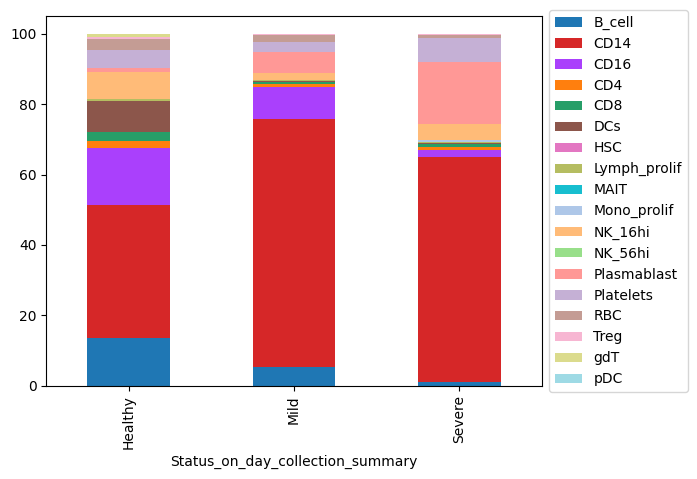

In [19]:
df_group.plot.bar(stacked=True, color=color).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

In [20]:
IFN_genes = ["ABCE1", 	"ADAR", 	"BST2", 	"CACTIN", 	"CDC37", 	"CNOT7", 	"DCST1", 	"EGR1", 	"FADD", 	"GBP2", 	"HLA-A", 	"HLA-B", 	"HLA-C", 	"HLA-E", 	"HLA-F", 	"HLA-G", 	"HLA-H", 	"HSP90AB1", 	"IFI27", 	"IFI35", 	"IFI6", 	"IFIT1", 	"IFIT2", 	"IFIT3", 	"IFITM1", 	"IFITM2", 	"IFITM3", 	"IFNA1", 	"IFNA10", 	"IFNA13", 	"IFNA14", 	"IFNA16", 	"IFNA17", 	"IFNA2", 	"IFNA21", 	"IFNA4", 	"IFNA5", 	"IFNA6", 	"IFNA7", 	"IFNA8", 	"IFNAR1", 	"IFNAR2", 	"IFNB1", 	"IKBKE", 	"IP6K2", 	"IRAK1", 	"IRF1", 	"IRF2", 	"IRF3", 	"IRF4", 	"IRF5", 	"IRF6", 	"IRF7", 	"IRF8", 	"IRF9", 	"ISG15", 	"ISG20", 	"JAK1", 	"LSM14A", 	"MAVS", 	"METTL3", 	"MIR21", 	"MMP12", 	"MUL1", 	"MX1", 	"MX2", 	"MYD88", 	"NLRC5", 	"OAS1", 	"OAS2", 	"OAS3", 	"OASL", 	"PSMB8", 	"PTPN1", 	"PTPN11", 	"PTPN2", 	"PTPN6", 	"RNASEL", 	"RSAD2", 	"SAMHD1", 	"SETD2", 	"SHFL", 	"SHMT2", 	"SP100", 	"STAT1", 	"STAT2", 	"TBK1", 	"TREX1", 	"TRIM56", 	"TRIM6", 	"TTLL12", 	"TYK2", 	"UBE2K", 	"USP18", 	"WNT5A", 	"XAF1", 	"YTHDF2", 	"YTHDF3", 	"ZBP1"]
IFN_genes_yoshida = ["BST2", "CMPK2", "EIF2AK2", "EPSTI1", "HERC5", "IFI35", "IFI44L", "IFI6", "IFIT3", "ISG15", "LY6E", "MX1", "MX2", "OAS1", "OAS2", "PARP9", "PLSCR1", "SAMD9", "SAMD9L", "SP110", "STAT1", "TRIM22", "UBE2L6", "XAF1", "IRF7"]

In [21]:
len(IFN_genes)

99

In [22]:
len(IFN_genes_yoshida)

25

In [23]:
adata_full = sc.read('../../../../pipeline/data/raw/Haniffa_all.h5ad')
adata_full

AnnData object with n_obs × n_vars = 647366 × 24929
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'raw'

In [24]:
IFN_genes_common = list(set(IFN_genes).intersection(set(adata_full.var_names)))
len(IFN_genes_common)

86

In [25]:
IFN_genes_common_yo = list(set(IFN_genes_yoshida).intersection(set(adata_full.var_names)))
len(IFN_genes_common_yo)

25

In [26]:
adata_full = adata_full[adata.obs_names].copy()
adata_full

AnnData object with n_obs × n_vars = 256051 × 24929
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'raw'

In [27]:
sc.pp.normalize_total(adata_full, target_sum=1e4)
sc.pp.log1p(adata_full)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: divide by zero encountered in log1p
  np.log1p(X, out=X)
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:352: RuntimeWarning: invalid value encountered in log1p
  np.log1p(X, out=X)


In [28]:
adata_full.obs['cell_attn'] = adata.obs['cell_attn'].copy()

In [29]:
adata_meyloid = adata_full[adata_full.obs.full_clustering.isin([
    'CD83_CD14_mono',
    'CD14_mono',
    'CD16_mono',
    'C1_CD16_mono',
    'DC1',
    'DC2',
    'DC3',
    'ASDC',
    'pDC',
    'DC_prolif',
    'Mono_prolif'
])].copy()

In [30]:
sc.tl.score_genes(adata_meyloid, IFN_genes_common_yo, score_name='IFN_score')

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


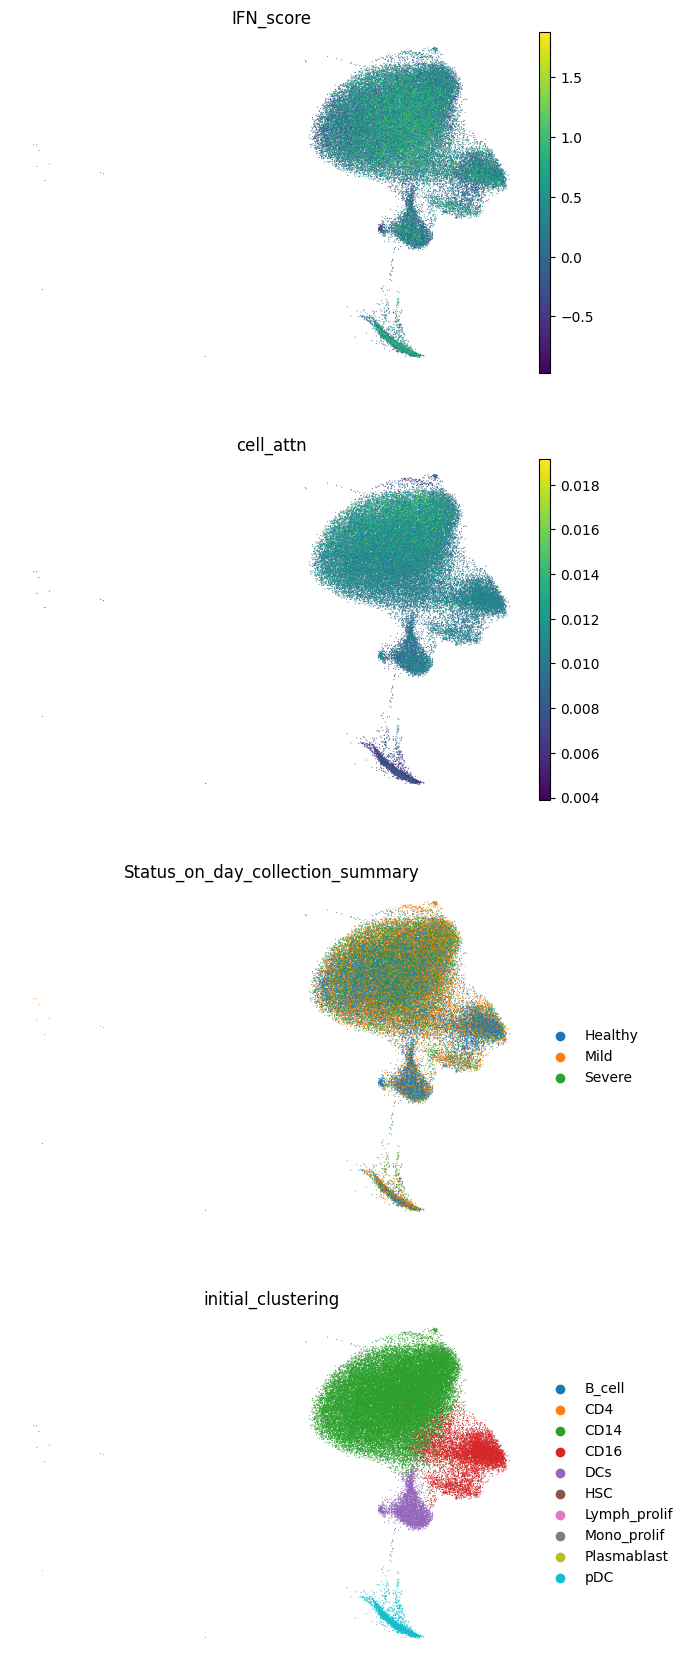

In [31]:
sc.pl.umap(adata_meyloid, color=['IFN_score', 'cell_attn', 'Status_on_day_collection_summary', 'initial_clustering'], frameon=False, ncols=1)

In [32]:
adata_covid_meyloid = adata_meyloid[adata_meyloid.obs['Status_on_day_collection_summary'] != 'Healthy'].copy()
adata_covid_meyloid

AnnData object with n_obs × n_vars = 37581 × 24929
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'cell_attn', 'IFN_score'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap', 'log1p', 'Status_on_day_collection_summary_colors', 'initial_clustering_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'raw'

In [33]:
adata_covid_meyloid.obs[['IFN_score', 'cell_attn']]

IFN_score  cell_attn
covid_index                                     
AAACCTGCACCAGTTA-MH9143325   0.450341   0.010388
AAACCTGGTACATGTC-MH9143325   0.778367   0.010630
AAACCTGGTGCCTTGG-MH9143325   0.813324   0.010274
AAACGGGAGAGTCTGG-MH9143325   0.608062   0.010318
AAACGGGAGGCCATAG-MH9143325   0.781777   0.009963
...                               ...        ...
BGCV15_GGACATTGTTCGTTGA-1   -0.532712   0.006338
BGCV15_GGCCGATTCGGTCTAA-1   -0.154144   0.011932
BGCV15_TGCGGGTCAGGTGGAT-1   -0.572327   0.009147
BGCV15_TGCTACCCAGTCAGAG-1   -0.491721   0.006781
BGCV15_TGGTTCCTCTGCTGCT-1   -0.316609   0.011219

[37581 rows x 2 columns]

In [34]:
scores1 = adata_covid_meyloid.obs[['IFN_score', 'initial_clustering']]
scores2 = adata_covid_meyloid.obs[['cell_attn', 'initial_clustering']]
scores1 = scores1.rename(columns={'IFN_score': 'score'})
scores2 = scores2.rename(columns={'cell_attn': 'score'})
scores1['type'] = 'IFN score'
scores2['type'] = 'cell attention'
scores1['score'] = (scores1['score']-scores1['score'].min())/(scores1['score'].max()-scores1['score'].min())
scores2['score'] = (scores2['score']-scores2['score'].min())/(scores2['score'].max()-scores2['score'].min())
scores = pd.concat([scores1, scores2])
scores

score initial_clustering            type
covid_index                                                            
AAACCTGCACCAGTTA-MH9143325  0.486598               CD14       IFN score
AAACCTGGTACATGTC-MH9143325  0.604095               CD14       IFN score
AAACCTGGTGCCTTGG-MH9143325  0.616617               CD14       IFN score
AAACGGGAGAGTCTGG-MH9143325  0.543093               CD14       IFN score
AAACGGGAGGCCATAG-MH9143325  0.605317               CD16       IFN score
...                              ...                ...             ...
BGCV15_GGACATTGTTCGTTGA-1   0.176525               CD14  cell attention
BGCV15_GGCCGATTCGGTCTAA-1   0.578795               CD16  cell attention
BGCV15_TGCGGGTCAGGTGGAT-1   0.378537               CD14  cell attention
BGCV15_TGCTACCCAGTCAGAG-1   0.208363               CD14  cell attention
BGCV15_TGGTTCCTCTGCTGCT-1   0.527540               CD14  cell attention

[75162 rows x 3 columns]

In [35]:
scores = scores[~scores['initial_clustering'].isin(['CD4', 'HSC', 'B_cell'])]
np.unique(scores['initial_clustering'])

array(['CD14', 'CD16', 'DCs', 'Mono_prolif', 'Plasmablast', 'pDC'],
      dtype=object)

In [36]:
scores['initial_clustering'] = scores['initial_clustering'].astype(str)

/tmp/ipykernel_249001/4255340119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores['initial_clustering'] = scores['initial_clustering'].astype(str)


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'CD14'),
  Text(1, 0, 'CD16'),
  Text(2, 0, 'pDC'),
  Text(3, 0, 'DCs'),
  Text(4, 0, 'Mono_prolif'),
  Text(5, 0, 'Plasmablast')])

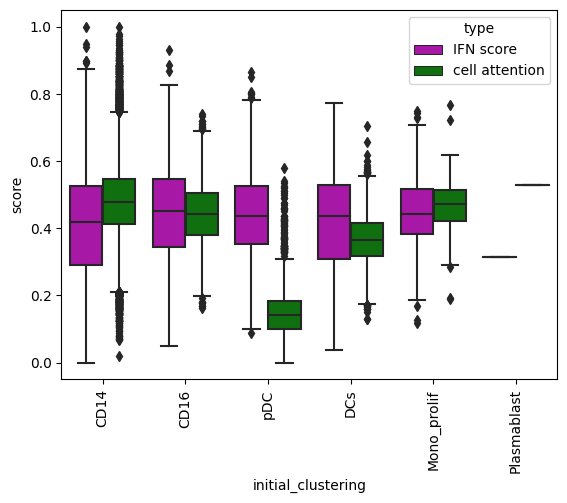

In [37]:
sns.boxplot(x="initial_clustering", y="score",
            hue="type", palette=["m", "g"],
            data=scores)
plt.xticks(rotation=90)

In [38]:
ifn_scores = scores[scores['type'] == 'IFN score']
cell_attn_scores = scores[scores['type'] == 'cell attention']

In [39]:
np.sum(ifn_scores.index != cell_attn_scores.index)

0

In [40]:
import scipy

In [41]:
scipy.stats.pearsonr(ifn_scores['score'], cell_attn_scores['score'])

PearsonRResult(statistic=-0.07219836238298775, pvalue=1.288753823341504e-44)

In [42]:
monocd14 = adata_covid_meyloid[adata_covid_meyloid.obs['initial_clustering'] == 'CD14'].copy()
monocd14

AnnData object with n_obs × n_vars = 28970 × 24929
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'cell_attn', 'IFN_score'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap', 'log1p', 'Status_on_day_collection_summary_colors', 'initial_clustering_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'raw'

In [43]:
scipy.stats.pearsonr(monocd14.obs['IFN_score'], monocd14.obs['cell_attn'])

PearsonRResult(statistic=-0.08040351301744056, pvalue=9.251610764895878e-43)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


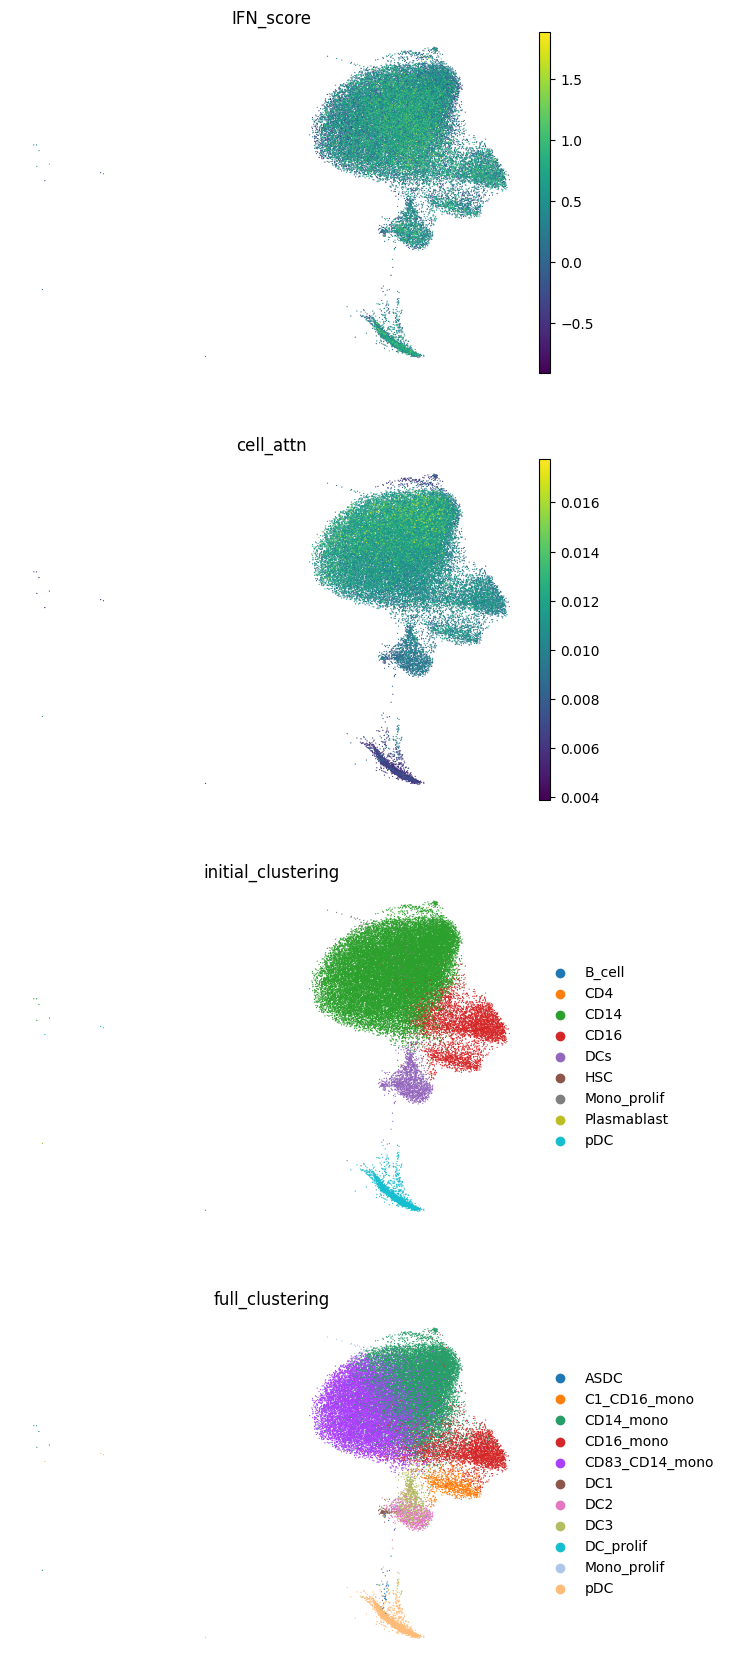

In [44]:
sc.pl.umap(adata_covid_meyloid, color=['IFN_score', 'cell_attn', 'initial_clustering','full_clustering'], ncols=1, frameon=False)

In [45]:
adata

AnnData object with n_obs × n_vars = 256051 × 2188
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id', 'split0', 'split1', 'split2', 'split3', 'split4', 'group', 'size_factors', '_scvi_batch', 'cell_attn_0', 'cell_attn_1', 'cell_attn_2', 'cell_attn_3', 'cell_attn_4', 'cell_attn', 'top_cells_Healthy', 'top_cells_Mild', 'top_cells_Severe'
    var: 'modality'
    uns: 'Site_colors', 'Status_on_day_collection_summary_colors', '_scvi_manager_uuid', '_scvi_uuid', 'full_clustering_colors', 'initial_clustering_colors', 'modality_lengths', 'neighbors', 'patient_id_colors', 'umap', 'top_cells_Healthy_colors', 'top_cells_Mild_colors', 'top_cells_Severe_colors'


In [46]:
adata_covid_meyloid.obs['Status_on_day_collection_summary'] = adata[adata_covid_meyloid.obs_names].obs['Status_on_day_collection_summary']
adata_covid_meyloid.obs['top_cells_Healthy'] = adata.obs['top_cells_Healthy']
adata_covid_meyloid.obs['top_cells_Mild'] = adata.obs['top_cells_Mild']
adata_covid_meyloid.obs['top_cells_Severe'] = adata.obs['top_cells_Severe']

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


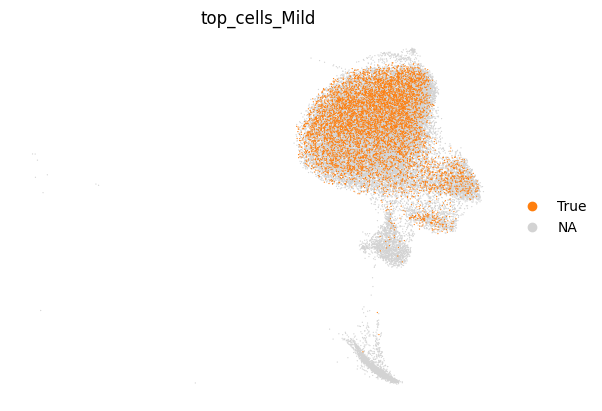

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


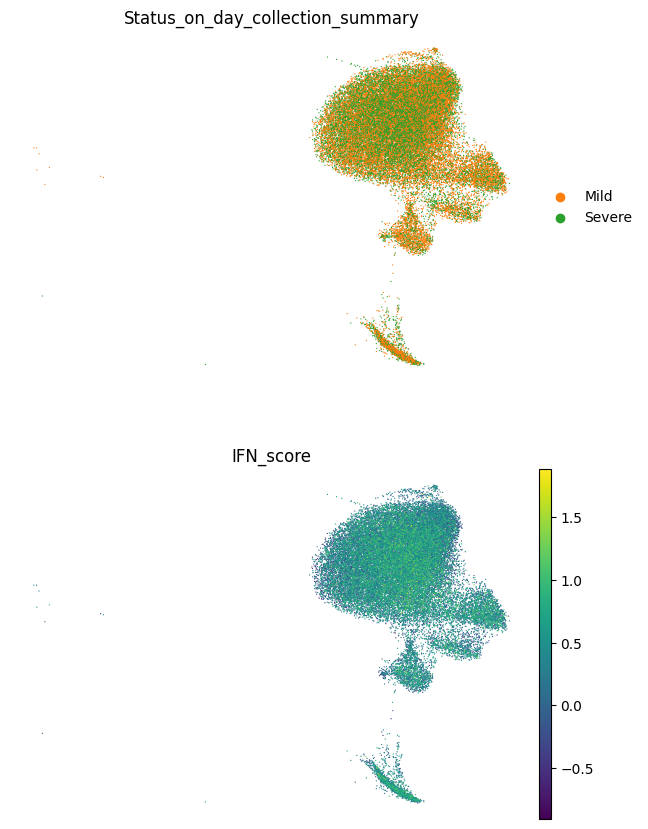

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


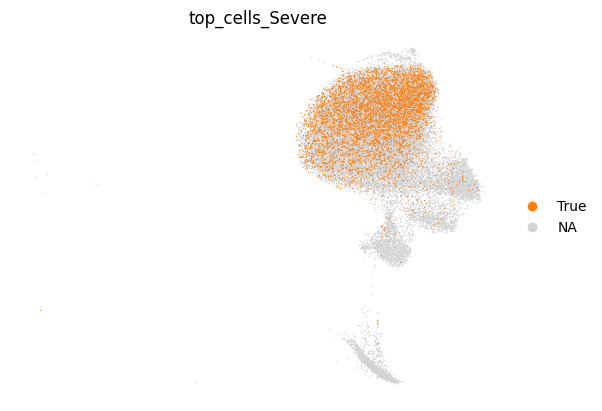

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/multimil/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


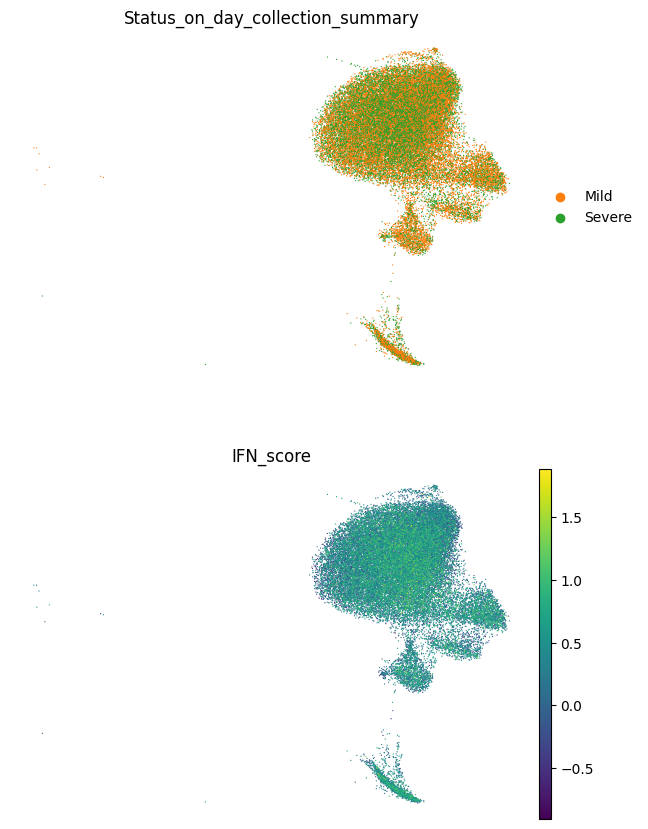

In [47]:
for cond in np.unique(adata_covid_meyloid.obs['Status_on_day_collection_summary']):
    sc.pl.umap(adata_covid_meyloid, color=[f'top_cells_{cond}'], groups=[True], frameon=False)
    sc.pl.umap(adata_covid_meyloid, color=['Status_on_day_collection_summary', 'IFN_score'], ncols=1, frameon=False)

In [48]:
monocd14.obs['Status_on_day_collection_summary'].value_counts()

Mild      15275
Severe    13695
Name: Status_on_day_collection_summary, dtype: int64

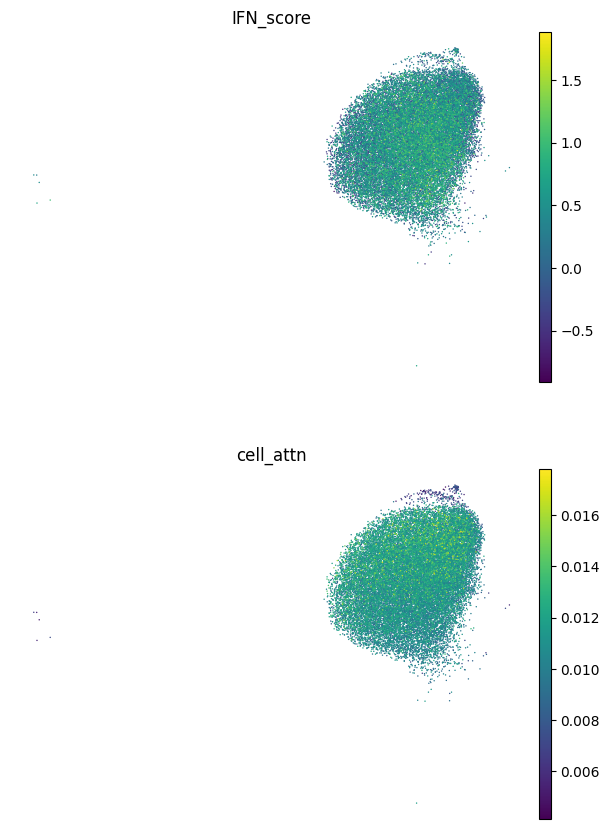

In [49]:
sc.pl.umap(monocd14, color=['IFN_score', 'cell_attn'], frameon=False, ncols=1)

<Axes: >

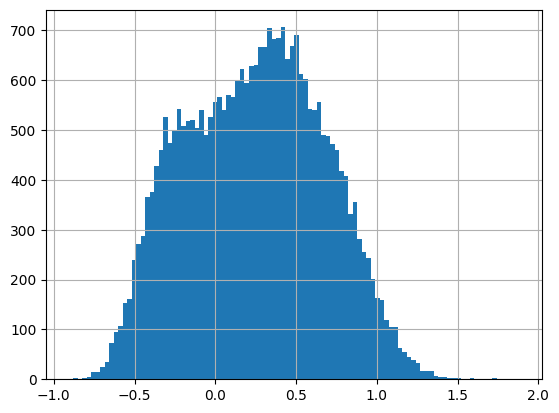

In [50]:
monocd14.obs['IFN_score'].hist(bins=100)